****Transação comercial de comércio eletrônico****

****1º Problema de Negócio****

****Sobre o conjunto de dados****

O comércio eletrônico se tornou um novo canal para dar suporte ao desenvolvimento de negócios. Por meio do comércio eletrônico, as empresas podem obter acesso e estabelecer uma presença de mercado mais ampla, fornecendo canais de distribuição mais baratos e eficientes para seus produtos ou serviços. O comércio eletrônico também mudou a maneira como as pessoas compram e consomem produtos e serviços. Muitas pessoas estão recorrendo aos seus computadores ou dispositivos inteligentes para encomendar produtos, que podem ser facilmente entregues em suas casas.

Contente
Este é um conjunto de dados de transações de vendas de e-commerce (varejo online) do Reino Unido por um ano. Esta loja sediada em Londres vende presentes e artigos para casa para adultos e crianças por meio do site desde 2007. Seus clientes vêm de todo o mundo e geralmente fazem compras diretas para si mesmos. Há também pequenas empresas que compram a granel e vendem para outros clientes por meio de canais de varejo.

O conjunto de dados contém 500 mil linhas e 8 colunas.

****2º Análise Exploratória****

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Importando a base de dados
df_sales = pd.read_csv('Sales Transaction v.4a.csv')


In [4]:
# Visualizando a base de dados
display(df_sales)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [5]:
# Analisando o tipo das variavéis
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [6]:
# Verificando a presença de valores nulos e duplicados
dados_ausentes = df_sales.isna().sum()

print(f'A quantidade de valores ausentes é: \n', dados_ausentes)
print('________________________________________________________')

# Verificando a presença de valores duplicados
duplicados = df_sales[df_sales.duplicated(keep=False)]
display(f'A quantidade de valores duplicados é: \n', duplicados)

A quantidade de valores ausentes é: 
 TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64
________________________________________________________


'A quantidade de valores duplicados é: \n'

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
984,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
985,581497,12/9/2019,21481,Fawn Blue Hot Water Bottle,7.24,1,17497.0,United Kingdom
1350,581538,12/9/2019,22992,Revolver Wooden Ruler,6.19,1,14446.0,United Kingdom
1354,581538,12/9/2019,22694,Wicker Star,6.19,1,14446.0,United Kingdom
1356,581538,12/9/2019,23275,Set Of 3 Hanging Owls Ollie Beak,6.19,1,14446.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,536569,12/1/2018,21809,Christmas Hanging Tree With Bell,11.53,1,16274.0,United Kingdom
535959,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
535960,536592,12/1/2018,82613A,Metal Sign Cupcake Single Hook,12.82,1,16592.0,United Kingdom
536189,536528,12/1/2018,22839,3 Tier Cake Tin Green And Cream,25.57,1,15525.0,United Kingdom


In [7]:
# Removendo os valores nulos
df_sales = df_sales.dropna()

In [8]:
# Removendo os valores duplicados
df_sales = df_sales.drop_duplicates(keep=False)

print(df_sales.duplicated().sum())

0


In [9]:
# Convertendo a coluna Date
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [10]:
# Verificando a alteração
df_sales.info()

display(df_sales)

<class 'pandas.core.frame.DataFrame'>
Index: 526301 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  526301 non-null  object        
 1   Date           526301 non-null  datetime64[ns]
 2   ProductNo      526301 non-null  object        
 3   ProductName    526301 non-null  object        
 4   Price          526301 non-null  float64       
 5   Quantity       526301 non-null  int64         
 6   CustomerNo     526301 non-null  float64       
 7   Country        526301 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [11]:
# Análise descritiva
df_sales.describe()

,Date,Price,Quantity,CustomerNo
count,526301,526301.000000,526301.000000,526301.000000
mean,2019-07-03 21:48:56.186706944,12.676971,10.057779,15217.720204
min,2018-12-01 00:00:00,5.130000,-80995.000000,12004.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13782.000000
50%,2019-07-19 00:00:00,11.940000,3.000000,15138.000000
75%,2019-10-18 00:00:00,14.090000,10.000000,16722.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,8.559303,218.680064,1716.693681


In [12]:
# Criando a coluna com o total das vendas
df_sales['Total_Sales'] = df_sales['Price'] * df_sales['Quantity']

# Exibindo as primeiras linhas para verificar o cálculo
display(df_sales)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total_Sales
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,-37.92
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,-42.27
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,-11.74
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,-65.40


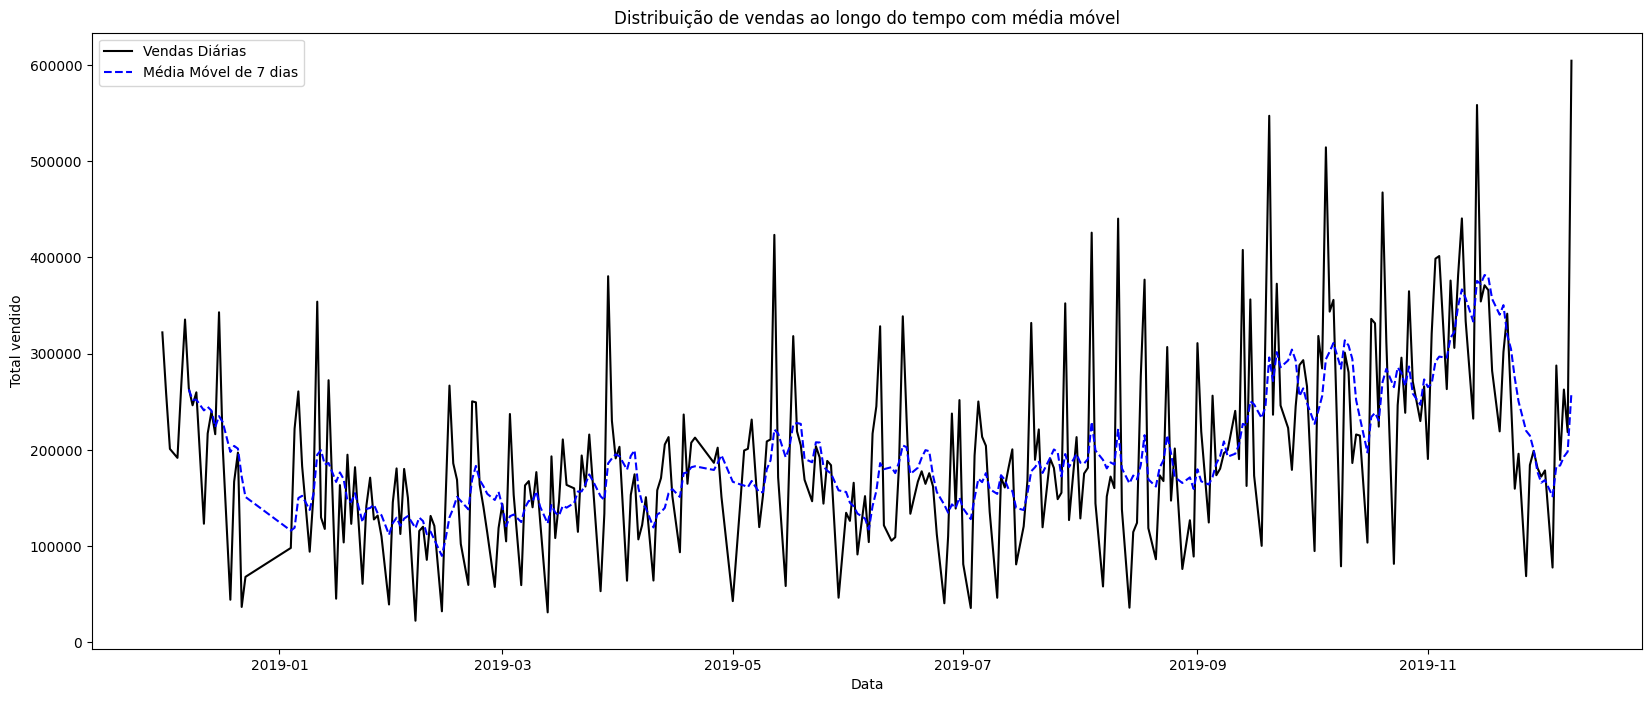

In [13]:
# Verificando a distribuição de vendas ao longo do tempo
vendas = df_sales.groupby('Date')['Total_Sales'].sum()

# Calculando a média móvel de 7 dias
vendas_ma = vendas.rolling(window=7).mean()

# Plotando as vendas diárias e a média móvel
plt.figure(figsize=(20, 8))
plt.plot(vendas, color='black', label='Vendas Diárias')
plt.plot(vendas_ma, color='blue', linestyle='--', label='Média Móvel de 7 dias')
plt.title('Distribuição de vendas ao longo do tempo com média móvel')
plt.xlabel('Data')
plt.ylabel('Total vendido')
plt.legend()
plt.show()

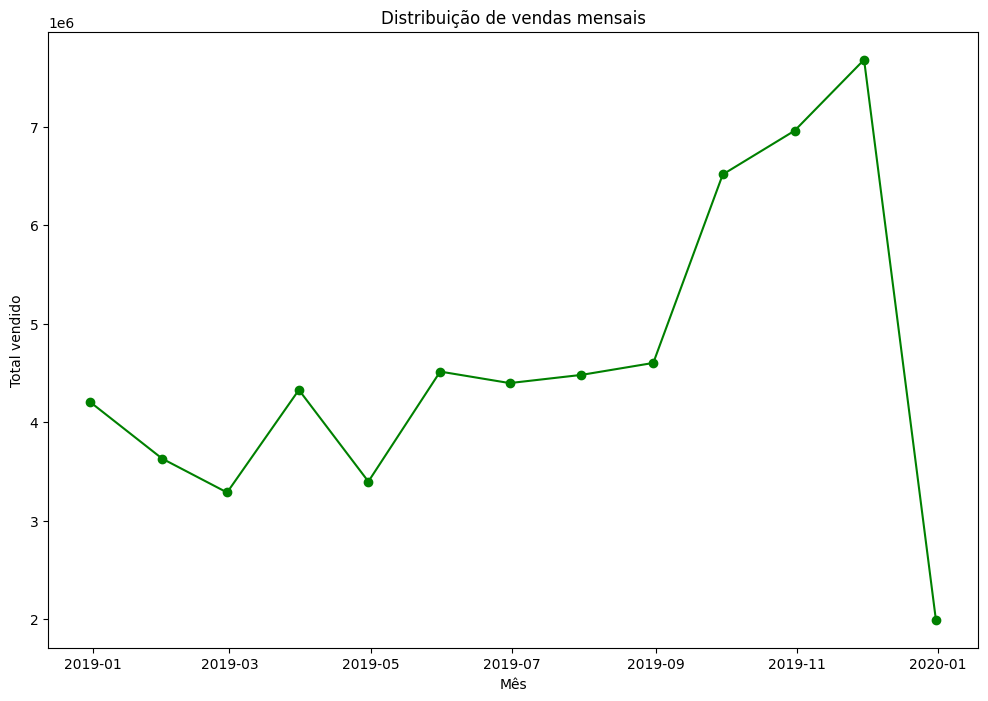

In [22]:
# Extraindo o mês do índice 'Date'
vendas_por_mes = vendas.resample('M').sum()

# Plotando as vendas mensais
plt.figure(figsize=(12, 8))
plt.plot(vendas_por_mes, color='green', marker='o', linestyle='-')
plt.title('Distribuição de vendas mensais')
plt.xlabel('Mês')
plt.ylabel('Total vendido')
plt.show()

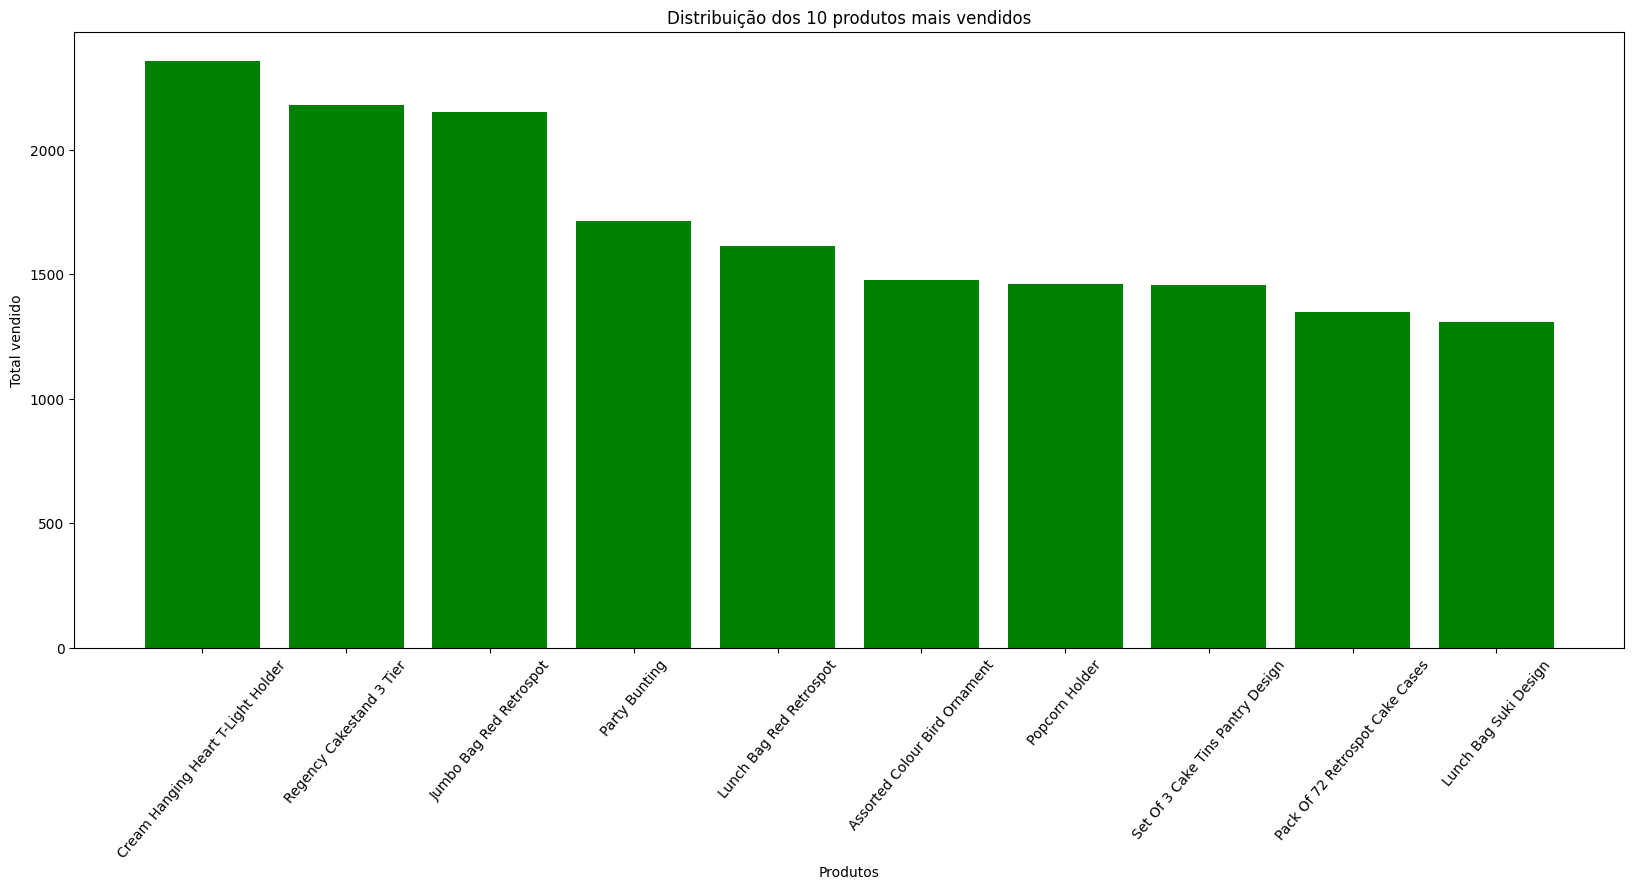

In [15]:
# Analisando os 10 produtos mais rentáveis
produtos_mais_vendidos = df_sales['ProductName'].value_counts().head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(20, 8))
plt.bar(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color='green')
plt.title('Distribuição dos 10 produtos mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Total vendido')
plt.xticks(rotation=50) 
plt.show()

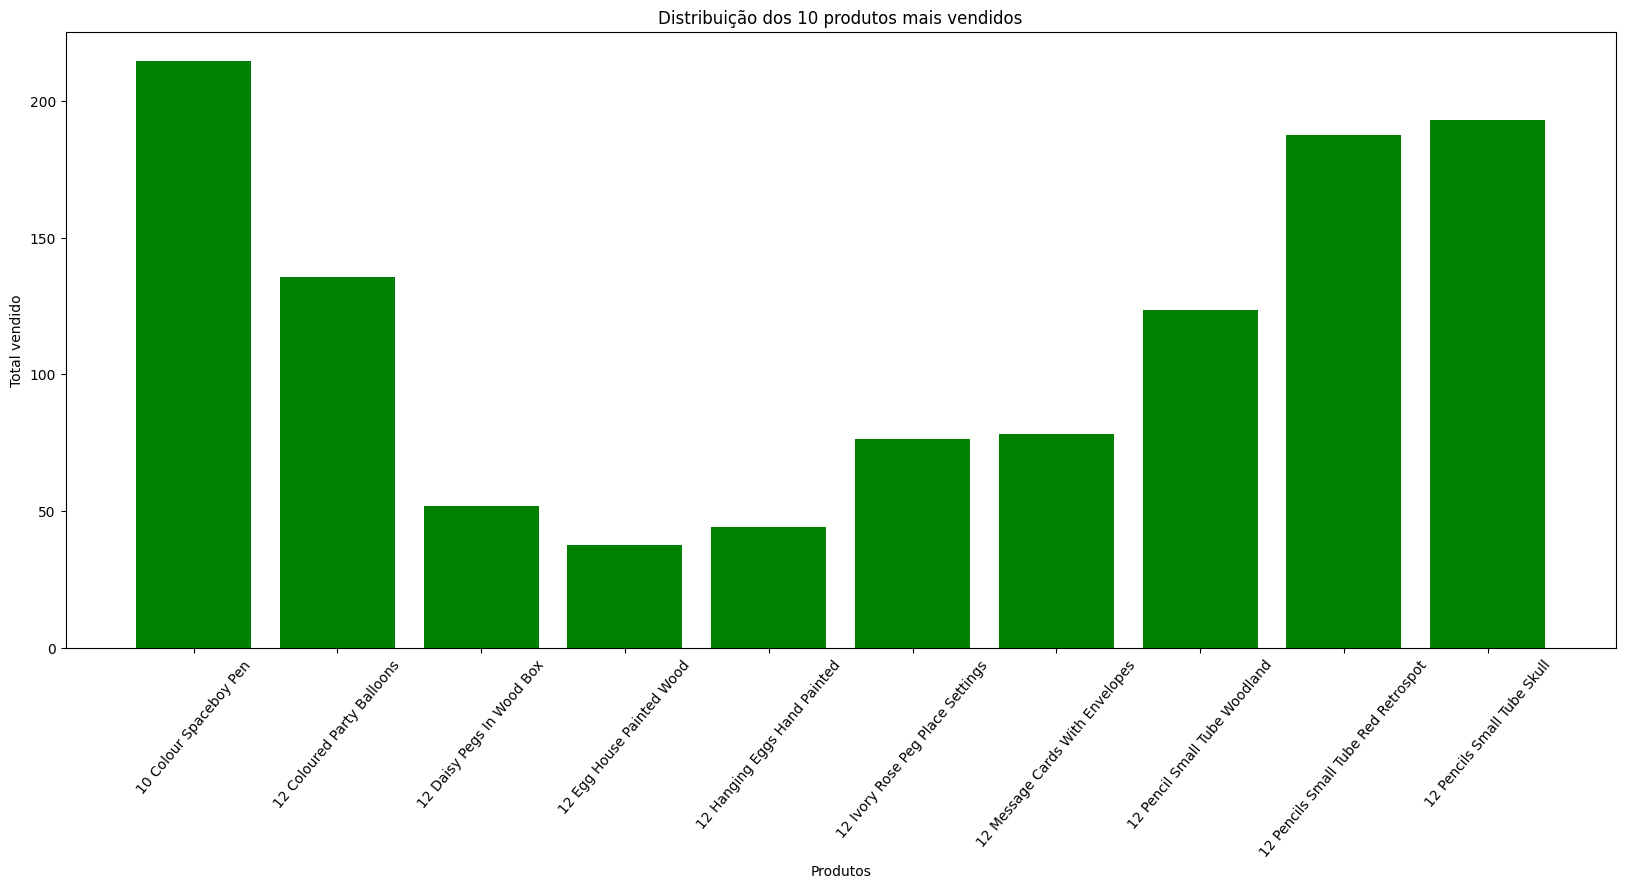

In [16]:
# Avaliando os produtos mais vendidos 
vendas_produtos = df_sales.groupby('ProductName')['Total_Sales'].mean().head(10)

# Plotando o gráfico
plt.figure(figsize=(20, 8))
plt.bar(vendas_produtos.index, vendas_produtos.values, color='green')
plt.title('Distribuição dos 10 produtos mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Total vendido')
plt.xticks(rotation=50) 
plt.show()

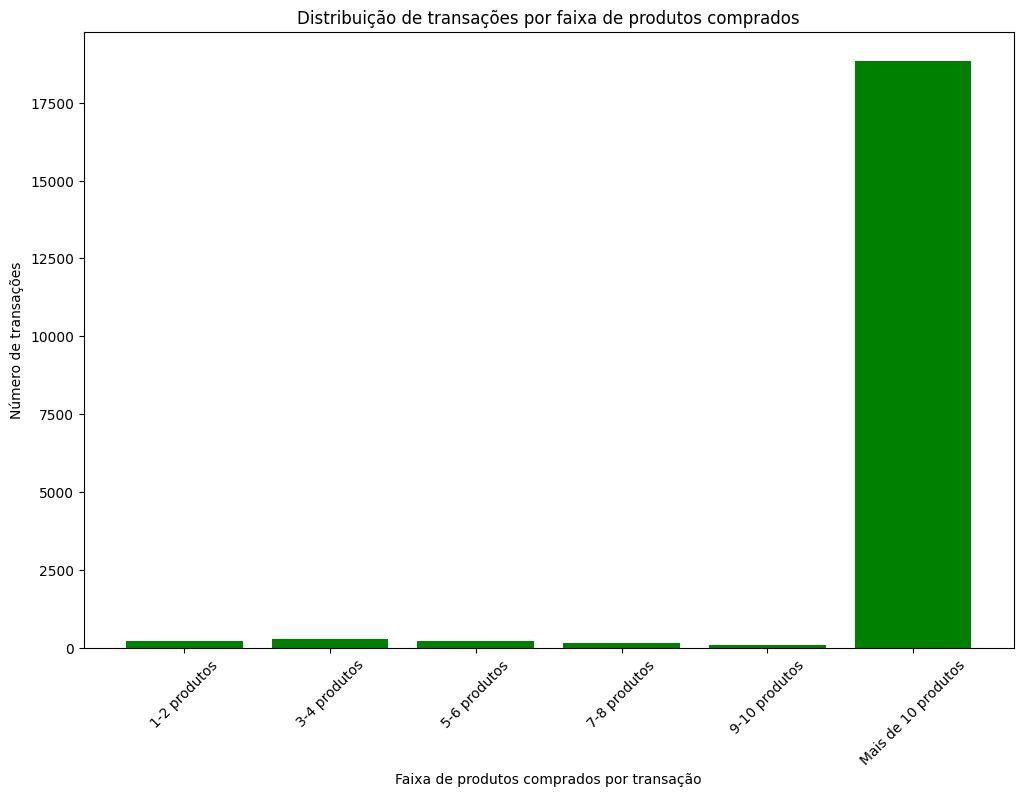

In [18]:
# Analisando a quantidade de produtos comprados por transação
produtos_por_transacao = df_sales.groupby(['TransactionNo', 'CustomerNo'])['Quantity'].sum().reset_index()

# Calculando a média de produtos por transação
media_produtos_por_transacao = produtos_por_transacao.groupby('TransactionNo')['Quantity'].mean().reset_index()

# Criando faixas para a média de produtos comprados
faixas = [0, 2, 4, 6, 8, 10, float("inf")] 
labels = ['1-2 produtos', '3-4 produtos', '5-6 produtos', '7-8 produtos', '9-10 produtos', 'Mais de 10 produtos']
media_produtos_por_transacao['Faixa'] = pd.cut(media_produtos_por_transacao['Quantity'], bins=faixas, labels=labels, right=False)

# Contando o número de transações em cada faixa
contagem_por_faixa = media_produtos_por_transacao['Faixa'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(contagem_por_faixa.index, contagem_por_faixa.values, color='green')
plt.title('Distribuição de transações por faixa de produtos comprados')
plt.xlabel('Faixa de produtos comprados por transação')
plt.ylabel('Número de transações')
plt.xticks(rotation=45)
plt.show()


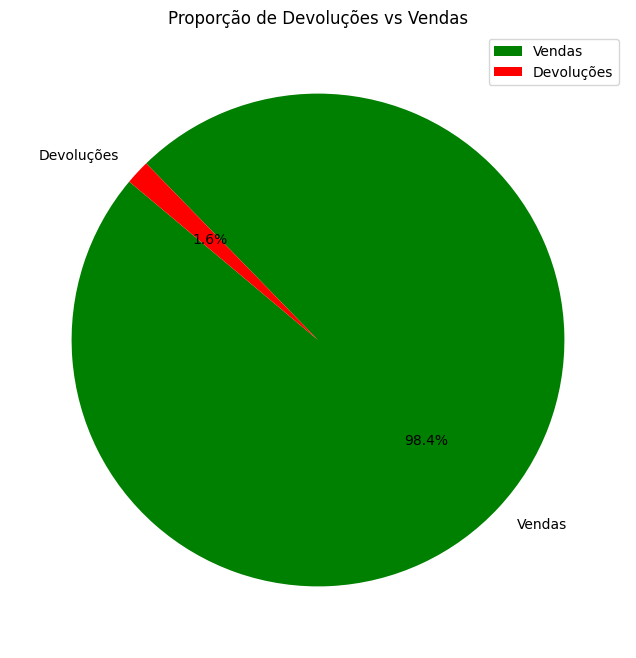

In [21]:
# Filtrando devoluções e vendas positivas
devolucoes = df_sales['Quantity'] < 0
contagem_devolucoes = devolucoes.value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(contagem_devolucoes, labels=['Vendas', 'Devoluções'], autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Proporção de Devoluções vs Vendas')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


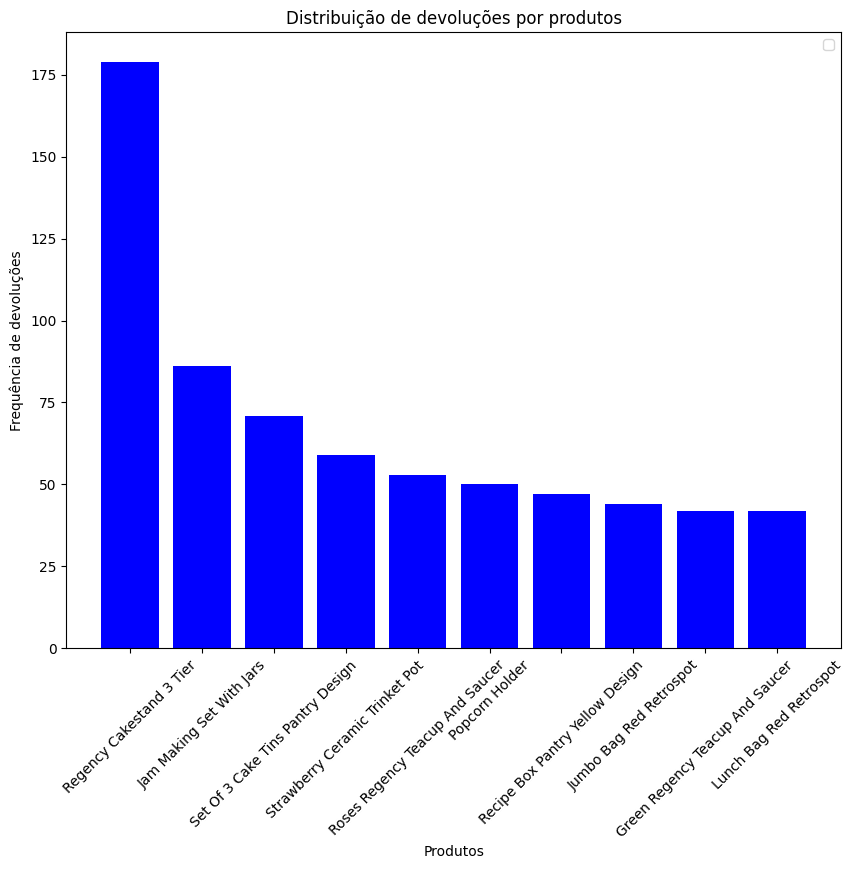

In [23]:
# Filtrando as devoluções por tipo de produto
df_devolucoes = df_sales[df_sales['Quantity']<0]

# Contagem de produtos devolvidos
retorno_por_produto = df_devolucoes['ProductName'].value_counts()

# Filtrando os 10 produtos com maiores indices de devoluções
top_10_produtos_devolvidos = retorno_por_produto.head(10)

# Exibindo o gráfico
plt.figure(figsize=(10,8))
plt.bar(top_10_produtos_devolvidos.index, top_10_produtos_devolvidos.values, color='blue')
plt.title('Distribuição de devoluções por produtos')
plt.xlabel('Produtos')
plt.ylabel('Frequência de devoluções')
plt.xticks(rotation=45)
plt.legend()
plt.show()

***Conclusão***

Os gráficos fornecem uma visão abrangente do desempenho de vendas, mostrando a evolução mensal ao longo de 2019 e início de 2020, com um pico no final de 2019 devido às festas de fim de ano, seguido de uma queda em janeiro de 2020. O segundo gráfico destaca os dez produtos mais vendidos, com o "Cream Hanging Heart T-Light Holder" liderando, e outros itens de decoração e utilidades domésticas em seguida, auxiliando no ajuste de estoque e foco em estratégias de marketing. O terceiro gráfico complementa ao detalhar o desempenho dos produtos ao longo do tempo, proporcionando um entendimento mais profundo do comportamento de vendas. Essas informações são cruciais para decisões de planejamento, gerenciamento de estoque, campanhas promocionais e estratégias de aquisição de clientes.
A proporção de devoluções é relativamente baixa 1.6% com o produto Regency Cakestand 3 Tier, com o maior indice de devolução superando até 175 unidades devolvidas.